# Identifying Disaster Tweets
 
I apply machine learning techniques on Twitter data to identify which tweets relate to genuine disasters. This could be useful, for example, for emergency services or news agencies.


In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, model_selection, preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [18]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [19]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [20]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [21]:
print("Train data shape:\n", train_df.shape, "\n")
print("Test data shape:\n", test_df.shape, "\n")

Train data shape:
 (7613, 5) 

Test data shape:
 (3263, 4) 



In [42]:
display("Random sample of disaster tweets:",train_df[train_df.target==1].text.sample(5))
print('\n')
display("Random sample of non disaster tweets:",train_df[train_df.target==0].text.sample(5))

'Random sample of disaster tweets:'

1138    The cryptic words that guided pilots on the Hi...
590     Hmm...this could be problem for some researche...
3629    Injuries Illnesses and Fatalities Latest Numbe...
5248    Refugio oil spill may have been costlier bigge...
69      Accident center lane blocked in #SantaClara on...
Name: text, dtype: object

'Random sample of non disaster tweets:'

5938    I SCREAMED 'WHATS A CHONCe' http://t.co/GXYivs...
6664    Generational Û÷British schismÛª over privacy...
3702    cause i know every man has a fear of a strong-...
5753    Riot Kit Bah - part of the new concept Gear co...
813     Amazon Deal - wait or buy? http://t.co/0T8VqKEArI
Name: text, dtype: object

## K Most Occuring Words Sorted by their Frequency


In [23]:
from collections import Counter
  
data_set = train_df["text"] + " "
data_set = data_set.str.cat()
  
# split() returns list of all the words in the string
split_it = data_set.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.

vocabulary_size = 10000
most_occuring = Counter.most_common(vocabulary_size)

vocab = [word for (word, count) in most_occuring]



# Vectorize the Data

In [24]:
#CountVectorizer converts a collection of text documents to a matrix of token counts
count_vectorizer = feature_extraction.text.CountVectorizer(vocabulary=vocab)

train_vectors = count_vectorizer.fit_transform(train_df["text"])
test_vectors = count_vectorizer.transform(test_df["text"])

# note that we're NOT using .fit_transform() for test data. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.

x_train, x_test, y_train, y_test = train_test_split(train_vectors.todense(), train_df["target"], 
                                                   test_size=0.33, random_state=42)
x_train.shape

(5100, 10000)

In [25]:

print(train_df["text"].head())


0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object


In [26]:
print(x_train[0:5])
print(x_train[0:5].shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
(5, 10000)


# RidgeClassifier (Kaggle example)


In [27]:
from sklearn import linear_model, metrics

## Our vectors are really big, so we want to push our model's weights toward 0 
## without completely discounting different words - 
## ridge regression is a good way to do this.
clf = linear_model.RidgeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is: " + f"{accuracy:.04f}")

f1 = metrics.f1_score(y_test, y_pred)
print("f1 is: " + f"{f1:.04f}")


Accuracy is: 0.7704
f1 is: 0.7225


# GaussianNB

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

clf = GaussianNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is: " + f"{accuracy:.04f}")

f1 = metrics.f1_score(y_test, y_pred)
print("f1 is: " + f"{f1:.04f}")


Accuracy is: 0.5973
f1 is: 0.6391


# DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_leaf_nodes=10) #This takes too long without some limit
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is: " + f"{accuracy:.04f}")

f1 = metrics.f1_score(y_test, y_pred)
print("f1 is: " + f"{f1:.04f}")

Accuracy is: 0.6590
f1 is: 0.6120


# Simple Neural Network

In [30]:
# needs vectorized data as input

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(vocabulary_size, )))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train, y_train, 
    epochs=20,
    batch_size=500,
    validation_split=0.2
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 5,121,025
Trainable params: 5,121,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - 2s 137ms/step - loss: 0.6497 - accuracy: 0.6934 - val_loss: 0.5932 - val_accuracy: 0.7549
Epoch 2/20
9/9 [==============================] - 1s 97ms/step - loss: 0.5192 - accuracy: 0.8157 - val_loss: 0.5212 - val_accuracy: 0.7676
Epoch 3/20
9/9 [==============================] - 1s 112ms/step - loss: 0.4167 - accuracy: 0.8490 - val_loss: 0.4862 - val_accuracy: 0.7824
Epoch 4/20
9/9 [==============================] - 1s 104ms/step - loss: 0.3424 - accuracy

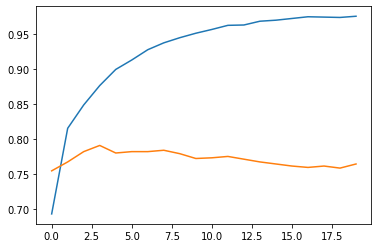

In [31]:
import matplotlib.pyplot as plt

accuracy_simple = model.history.history["accuracy"]
val_accuracy_simple = model.history.history["val_accuracy"]

plt.plot(model.history.history["accuracy"], label="accuracy-simple")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy-simple")
#plt.title("Accuracy with Simple Neural Network")
#plt.legend()
#plt.show()
#plt.close()

#plt.plot(model.history.history["loss"], label="loss")
#plt.plot(model.history.history["val_loss"], label="val_loss")
#plt.title("Loss with Simple Neural Network")
#plt.legend()
#plt.show()
#plt.close()

# Neural Networks with Embedding

In [32]:
x_train = train_df["text"]
y_train = train_df["target"]

x_train[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

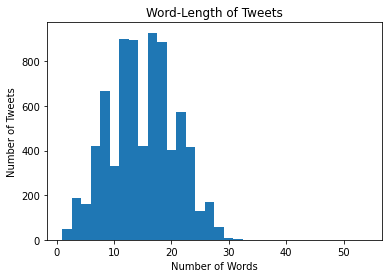

In [33]:
# working out word length of tweets

lengths = [len(t.split(' ')) for t in train_df["text"]]

plt.hist(lengths, bins=len(set(lengths)))
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.title('Word-Length of Tweets')
plt.show()

# the chart shows that 30 is a reasonable sequence length

sequence_length = 30

In [34]:
# Tokenizing

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(x_train)
x_train_tokenized = tokenizer.texts_to_sequences(x_train)

print(train_df["text"][0])
print(x_train_tokenized[0])


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
[120, 4634, 25, 5, 869, 9, 22, 264, 139, 1620, 4635, 90, 41]


In [14]:
# Padding and Truncating

from tensorflow.keras import preprocessing

x_train_padded = preprocessing.sequence.pad_sequences(
    x_train_tokenized,
    maxlen=sequence_length,
    padding="post",
    truncating="post"
)


In [15]:
from tensorflow.keras import models, layers

model = models.Sequential()

embedding_size = 16
model.add(layers.Embedding(vocabulary_size, embedding_size, input_length=sequence_length))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train_padded, y_train,
    epochs=20,
    batch_size=500,
    validation_split=0.2
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 481       
Total params: 160,481
Trainable params: 160,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
13/13 [==============================] - 1s 13ms/step - loss: 0.6853 - accuracy: 0.5831 - val_loss: 0.6856 - val_accuracy: 0.5358
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.5918 - val_loss: 0.6821 - val_accuracy: 0.5358
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6532 - accuracy: 0.5982

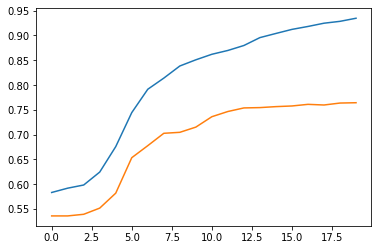

In [16]:
accuracy_embedding = model.history.history["accuracy"]
val_accuracy_embedding = model.history.history["val_accuracy"]

plt.plot(model.history.history["accuracy"], label="accuracy-embedding")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy-embedding")
#plt.title("Accuracy with Neural Network + Embedding")
#plt.legend()
#plt.show()
#plt.close()

#plt.plot(model.history.history["loss"], label="loss")
#plt.plot(model.history.history["val_loss"], label="val_loss")
#plt.title("Loss with Neural Network + Embedding")
#plt.legend()
#plt.show()
#plt.close()

# Neural Networks with Embedding & LSTM

In [17]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Embedding(vocabulary_size, embedding_size, input_length=sequence_length))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train_padded, y_train,
    epochs=20,
    batch_size=500,
    validation_split=0.2
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 16)            160000    
_________________________________________________________________
lstm (LSTM)                  (None, 30, 32)            6272      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 174,625
Trainable params: 174,625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
13/13 [==============================] - 8s 173ms/step - loss: 0.6878 - accuracy: 0.5655 - val_loss: 0.6908 - val_accuracy: 0.5345
Epoch 2/20
13/13 [==============================] - 1s 94ms/step - loss: 0.6768 - accuracy: 0.5793 - val

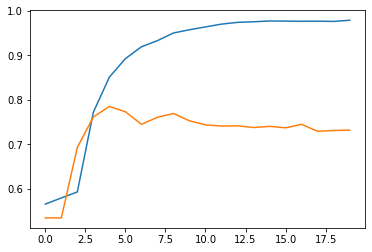

In [18]:
accuracy_lstm = model.history.history["accuracy"]
val_accuracy_lstm = model.history.history["val_accuracy"]

plt.plot(model.history.history["accuracy"], label="accuracy-lstm")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy-lstm")
#plt.title("Comparing simple NN with Embedding & LSTM")
#plt.legend()
#plt.show()
#plt.close()

#plt.plot(model.history.history["loss"], label="loss")
#plt.plot(model.history.history["val_loss"], label="val_loss")
#plt.title("Loss with Neural Network + Embedding & LSTM")
#plt.legend()
#plt.show()
#plt.close()

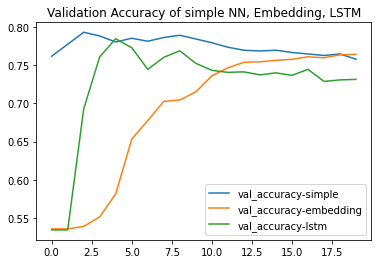

In [24]:
plt.plot(val_accuracy_simple, label="val_accuracy-simple")
plt.plot(val_accuracy_embedding, label="val_accuracy-embedding")
plt.plot(val_accuracy_lstm, label="val_accuracy-lstm")
plt.title("Validation Accuracy of simple NN, Embedding, LSTM")
plt.legend()
plt.show()
plt.close()


